# Pandas Tutorial

In [1]:
import pandas as pd

| Time - Topic | Video Overview |
| :--- | :--- |
| 3:58 - Intro to Dataframes | Creating DataFrames, Index/Columns, Basic Functionality |
| 8:25 - Loading in DataFrames from Files | (CSV, Excel, Parquet, etc.) |
| 13:42 - Accessing Data | .head() .tail() .sample() |
| 15:28 - Accessing Data | .loc() .iloc() |
| 19:20 - Setting DataFrame Values | loc() & iloc() |
| 20:20 - Accessing Single Values | .at() .iat() |
| 21:11 - Accessing Data | Grab Columns, Sort Values, Ascending/Descending |
| 23:01 - Iterating over a DataFrame (df) with a For Loop | df.iterrows() |
| 24:12 - Filtering Data | Syntax Options, Numeric Values, Multiple Conditions |
| 27:58 - Filtering Data | String Operations, Regular Expressions (Regex) |
| 33:09 - Filtering Data | Query Functions |
| 34:20 - Adding / Removing Columns | Basics, Conditional Values, Math Operations, Renaming Columns |
| 41:40 - Adding / Removing Columns | String Operations, Datetime (pd.to_datetime) Operations |
| 46:38 - Saving our Updated DataFrame | (df.to_csv, df.to_excel, df.to_parquet, etc) |
| 47:14 - Adding / Removing Columns | Using Lambda & Custom Functions w/ .apply() |
| 50:42 - Merging & Concatenating Data | pd.merge(), pd.concat(), types of joins |
| 58:33 - Handling Null Values (NaNs) | .fillna() .interpolate() .dropna() .isna() .notna() |
| 1:04:05 - Aggregating Data | value_counts() |
| 1:05:47 - Aggregating Data | Using Groupby - groupby() .sum() .mean() .agg() |
| 1:08:24 - Aggregating Data | Pivot Tables |
| 1:10:28 - Groupby combined with Datetime Operations | *-* |
| 1:14:38 - Advanced Functionality | .shift() .rank() .cumsum() .rolling() |
| 1:22:10 - New Functionality | Pandas 1.0 vs Pandas 2.0 - pyarrow |
| 1:25:29 - New Functionality | GitHub Copilot & OpenAI ChatGPT |
| 1:32:05 - What Next?? | Continuing your Python Pandas Learning… |

## Intro to Dataframes

ok, mari belajar mengenai `Data Frame` terlebih dahulu. Data Frame merupakan struktur utama dalam *library Python Pandas*. Dan kita bisa mengganggap *Data Frame* sebagai `Table` dengan tambahan toping dan fungsi. Jadi membebaskan kita bekerja dengan *spreadsheet* (excel) dan tipe lainya dengan mudah di Python.  

### Creating DataFrame


Ok, jadi seperti apa bentuk Data Frame? Well, kita bisa buat data kita sendiri dengan sangat mudah dengan cara seperti :

```python
df = pd.DataFrame(...data..)
```

In [2]:
# kita beri data bentuk 2D Array

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])

Ok, yang bisa kita lihat dari DataFrame diatas dan mulai melihat komponen yang membuat DataFrame itu sendiri.

In [3]:
# melihat 5 data teratas
df.head()

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


karena data sederhana yang kita buat hanya terdiri dari 3 baris, maka hanya akan menampilkan 3 baris

---

#### , columns = [ ... ]

Kita juga bisa menambahkan nama kolom pada DataFrame yang kita buat dengan menambahkan 

```python
, columns = ["A", "B", "C"]
```

jangan lupa tambahkan koma `,` sebelum menambah syntax `columns`

In [4]:
# menambahkan nama kolom

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], columns = ['A', 'B', 'C'])

In [5]:
# kita cek lagi 5 data teratas menggunakan .head()
df.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


---

### Basic Function

#### .head()

Diatas kita tahu fungsi `.head()` untuk melihat 5 data teratas. Namun, kita juga bisa mengotak-atik `.head()` dengan memasukan angka bebas

In [6]:
# melihat 1 baris teratas
df.head(1) # ganti angka 1 dengan angka bebas

,A,B,C
0,1,2,3


In [7]:
# melihat 2 baris teratas
df.head(2)

,A,B,C
0,1,2,3
1,4,5,6


In [8]:
# melihat 1 baris teratas
df.head(3)

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


---

#### .tail()

Jika `.head()` digunakan untuk melihat 5 data teratas, maka `.tail()` digunakan untuk melihat 5 data terakhir.

In [9]:
df.tail()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [10]:
# 1 baris paling bawah atau -1
df.tail(1)

,A,B,C
2,7,8,9


In [11]:
# 2 baris paling bawah atau -1
df.tail(1)

,A,B,C
2,7,8,9


---

### Usefull Function

#### .columns

`.columns` untuk melihat *header* atau `nama kolom` yang ada dalam suatu DataFrame. 

In [12]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

---

#### .info

**`.info`** sangat berguna jika kita ingin melihat informasi lengkap dari `DataFrame` yang kita miliki

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


Kalau kita lihat sekilas **`df.info`** diatas, kita memiliki **`3 baris`** dan **`3 kolom`**. Serta ketiganya memiliki tipe data **integer 64bit** dimana :

int64 = 64 Bits = 8 Byte.

Lalu informasi lainnya adalah ukuran DataFrame kita 96.0 bytes

---

#### .describe()

In [14]:
df.describe()

,A,B,C
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


**`.describe()`** juga memberikan informasi yang berarti mengenai data kita. seperti rata-rata (`mean`), standar deviasi (`std`), nilai terkecil (`min`) dan lainnya. 

---

#### .nunique()

Digunakan untuk melihat data yang unik dalam satu DataFrame yang kita miliki

In [15]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [16]:
df.nunique()

A    3
B    3
C    3
dtype: int64

^ maksudnya ada 3 data unik di kolom A, B, dan C

In [17]:
df["A"].nunique

<bound method IndexOpsMixin.nunique of 0    1
1    4
2    7
Name: A, dtype: int64>

^ di kolom `A` ada 1, 4, dan 7 yang sifatnya unik.

---

#### .shape

Function yang berguna selanjutnya adalah **`.shape`**. Berguna untuk melihat berapa jumlah kolom dan baris yang kita miliki

In [18]:
df.shape

(3, 3)

Maksudnya memiliki 3 baris dan 3 kolom. Kita buat data baru deh biar bisa lihat dengan jelas

In [19]:
# menambah data baru untuk cek .shape
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9], [10,11,12] ], columns = ['A', 'B', 'C'])

In [20]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [21]:
df.shape

(4, 3)

yang berarti data diatas memiliki 4 baris dan 3 kolom

---

#### .size

size sih penting ga penting ya, ya karena cuman kaya melihat total data kalo di itung satu - satu ada berapa.

In [22]:
df.size

12

Dengan asumsi tidak ada data kosong dan semua data di kolom dan baris terisi semua. 12 dengan mudah kita ketahui hasilnya dari 4 (baris) x 3 (kolom)

---

### Index / Columns

lalu jika kita ingin melihat kembali DataFrame buatan kita tadi, 

In [23]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


Angka `0`, `1`, dan `2` merupakan **`index`** atau nomor baris dalam suatu *DataFrame*. Kita bia cek dengan cara seperti ini :

#### .index

In [24]:
df.index

RangeIndex(start=0, stop=4, step=1)

---

#### .index.tolist()

Dan kita juga bisa melihatnya dalam bentuk *list*.

In [25]:
df.index.tolist()

[0, 1, 2, 3]

---

#### , index = [ ... ]

Secara *default*, `index` mengurutkan data dengan angka dimulai dari `0`, `1`, `2` dan seterusnya sampai baris terakhir. Namun kita bisa menggantinya dengan selain angka seperti ini :  

In [26]:
# kita modif data df diatas
# mengganti index menjadi huruf

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]] , columns = ['A', 'B', 'C'] , index=["A", "B", "C"])

In [27]:
df

,A,B,C
A,1,2,3
B,4,5,6
C,7,8,9


In [28]:
# kita modif data df diatas
# mengganti index menjadi huruf

df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]] , columns = ['A', 'B', 'C'] , index=["x", "y", "z"])

In [29]:
df

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9


coba kita cek lagi 

In [30]:
df.index

Index(['x', 'y', 'z'], dtype='object')

---

## Loading DataFrames from File

### CSV File

Membuat DataFrame seperti :

```python
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]] , columns = ['A', 'B', 'C'] , index=["x", "y", "z"])
```

Sebenarnya memang bisa. tapi dalam dunia nyata, biasanya kita akan *load* dari file. Mari kita latihan menggunakan data sederhana.

Kita punya data csv sederhana, yaitu coffee.csv yang berisi data sederhana seperti berikut :

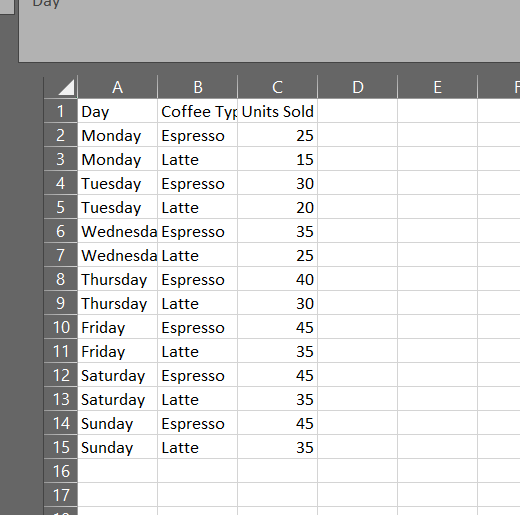

Merupakan data sederhana dari penjualan kopi dari sebuah cafe dan kita akan mencoba membaca file tersebut menggunakan Python

```python
pd.read_csv(file_name)
```

In [31]:
coffee = pd.read_csv('./warm-up data/coffee.csv') 
# maksud . tuh mundur satu folder sebelumnya, lalu masuk ke folder warm-up data

In [32]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


Salah satu hal yang keren di Python Pandas adalah kita ga harus mendownload data di lokal, kita bisa menggunakan repo di Github. 

Caranya, bebas mau menggunakan `repo` milik siapa pun. Lalu cari file `csv`, lalu klik pada bagian **`raw`**

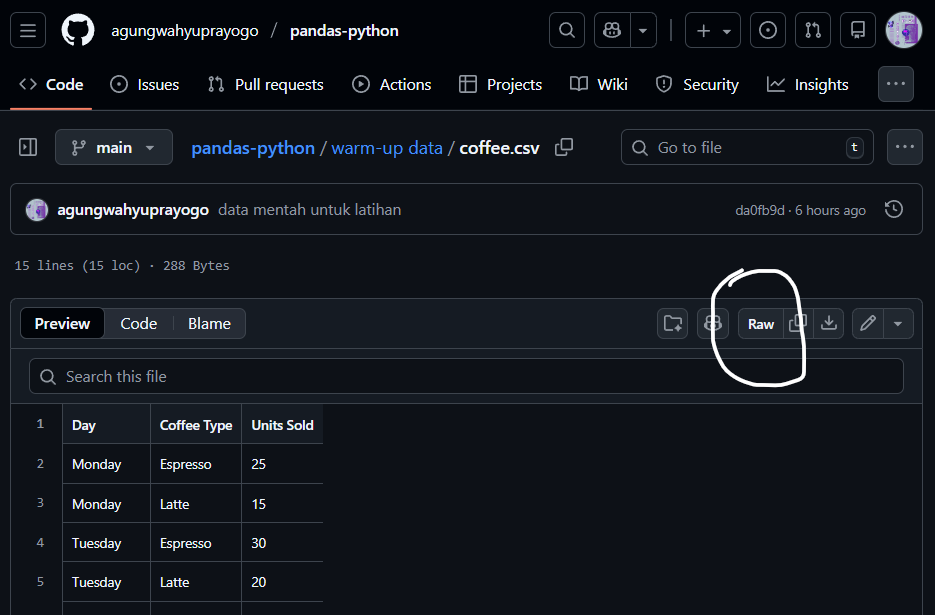

Jika sudah, kita bisa tinggal copy link yang ada diatas :

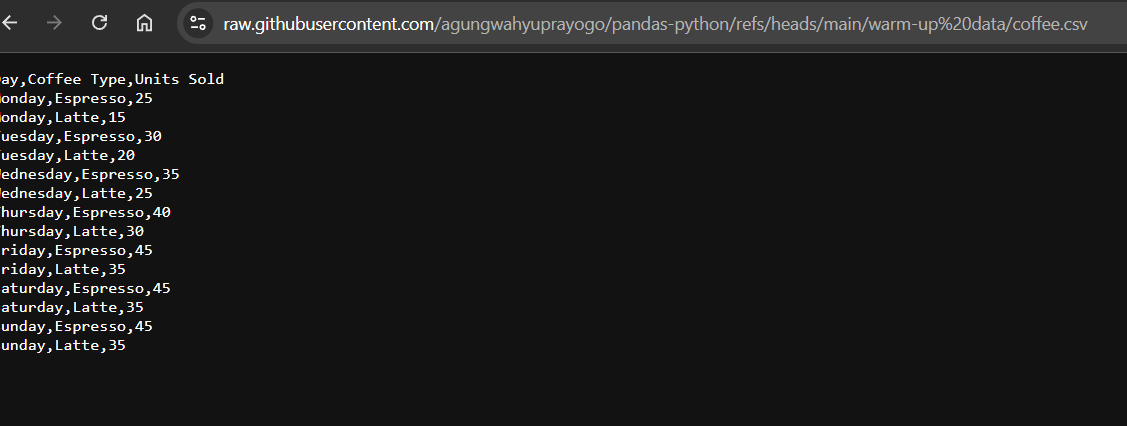

In [33]:
# masukan link pada ('link')
coffee = pd.read_csv('https://raw.githubusercontent.com/agungwahyuprayogo/pandas-python/refs/heads/main/warm-up%20data/coffee.csv')

In [34]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Namun, agar komputasi berjalan lancar, disarankan untuk mendownload file ke dalam lokal dan *load* data tersebut. Jika menggunakan data dari internet di 'takutkan' akan memakan waktu lebih lama dan takut ada kendala lainnya.

In [35]:
# from local
coffee = pd.read_csv('./warm-up data/coffee.csv')

In [36]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Beberapa hal yang perlu kamu ketahui tentang *load data* adalah `CSV` merupakan data yang paling umum digunakan. Bukan bentuk data yang terbaik, tapi kembali lagi dengan kebutuhan dan kasus yang dibutuhkan. Namun satu hal menyenangkan mengenai `csv` adalah mereka mudah untuk dibaca. Memang ada satu **kelemahan** dari file berformat `csv` ini, **yaitu memiliki ukuran yang terbilang besar**. 

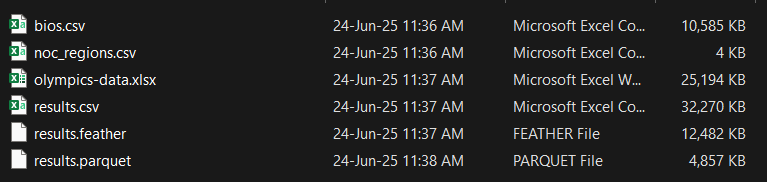

Saya memiliki data `Result` dari *Olympic* tahun 1860 adalah **ukurannya mencapai sekitar 32 Megabytes** hanya untuk ukuran satu file `csv`.

Tak perlu khawatir, **ada bentuk format file yang dapat kita gunakan** seperti format file **`feather`** yang memiliki data yang plek-numplek sama tapi ukurannya cuma **`12 Megabytes`**. Atau file dengan format **`parquet`** yang hanya memiliki ukuran **4 Megabytes**, dimana format file tersebut sangat populer di dunia _data engineering_.

Alternatif lain kita dapat menggabung beberapa file `csv` ke dalam bentuk file **`Excel`**. Dapat digunakan juga namun akan menjadi **file dengan waktu loading paling lama dari pada file format lain**.

Dengan Python, kita dapat load semua bentuk format diatas dengan cara berikut :

### Feather File

In [37]:
results = pd.read_feather('./data/results.feather')

In [38]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


---

### Parquet File

In [39]:
results = pd.read_parquet('./data/results.parquet')

In [40]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


Kita lihat, kita dapat melihat data `Olympic Result` ini dalam bentuk Data Frame **begitu mudah dan cepat.**

### Excel File

Kita pun dapat *load* data file excel dengan cara berikut :

In [41]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx')

Lama bet njirr :v oke kita lihat dulu isi datanya :

In [42]:
olympics_data.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


Karena file excel bisa menaruh `sheets` lebih dari satu, 

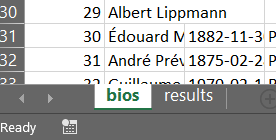

kita bisa juga untuk lebih spesifik mengambil data `sheets` bagian mana yang kita mau :

In [43]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx', sheet_name="results")

Alamak harus **nunggu 17 detik hanya untuk load satu file `excel`** :) padahal file dengan **format `parquet` cuman butuh sekitar 1-2 detik**. jadi kalo kalian butuh waktu dengan cepat, disarankan menggunakan file dengan format `parquet`. Tapi yaa kalo kalian bekerja dan terpaksa berkolaborasi dengan orang lain ya memang `csv` sudah cukup.

Dan sekarang kalo kita lihat harusnya data `Olympics` di `sheets` sudah berubah : 

In [44]:
olympics_data.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


### Konversi Format File

Namun jika memang benar-benar dibutuhkan untuk load data dalam bentuk format lain, kita dapat mengkonversi nya dengan cara berikut :

In [45]:
bios = pd.read_csv('./data/bios.csv')

Supaya kita masukan ke dalam folder `konversi data`. Agar data tidak berantakan dan tidak satu folder dengan file ipynb

#### .to_parquet()

In [46]:
# Untuk Parquet
bios.to_parquet("konversi data/bios.parquet")

#### .to_feather()

In [47]:
# Untuk Feather
bios.to_feather("konversi data/bios.feather")

**Kita tes panggil lagi ya**

In [48]:
bios_parquet = pd.read_parquet('konversi data/bios.parquet')
bios_parquet

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,None
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,None
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,None
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,None
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


In [49]:
bios_feather = pd.read_feather('konversi data/bios.feather')
bios_feather

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,None
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,None
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,None
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,None
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


berhasil semua!

Sebenarnya ga cuman `to_parquet`, `to_feather`, tapi juga masih banyak yang lain bahkan ke csv, excel.

---

---

---

## Accessing Data I

oke, selanjutnya kita liat bagaimana kita bisa mengakses data dengan cara yang berbeda-beda menggunakan `Pandas`.

DataFrame percontohan menggunakan `coffee.csv`. 

Dan pertama kita ingin melihat 5 data teratas menggunakan `.head()`

### .head()

In [50]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


Jika ingin melihat 7 data teratas, cukup masukan angka 7 dalam tanda kurung

In [51]:
coffee.head(7)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40


---

Untuk melihatnya secara full cukup dengan :

#### DataFrame names

ini paling simple

In [52]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


---

#### print(DataFrame Name)

Namun ada beberapa environmet / editor yang tidak secara otomatis menampilkan cara diatas, sehingga harus kita `print()` terlebih dahulu baru muncul

In [53]:
print(coffee)

          Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35


---

#### display(DataFrame Name)

Bisa juga menggunakan `display()`. ya walaupun hasilnya tetap akan sama

In [54]:
display(coffee)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


---

### .tail()

Untuk melihat 5 data terakhir, secara *default* kita cukup mengetik .tail()

In [55]:
coffee.tail()

,Day,Coffee Type,Units Sold
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


Jika berubah pikiran seperti ingin melihat 7 data terakhir :

In [56]:
coffee.tail(7)

,Day,Coffee Type,Units Sold
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


---

### .sample

salah satu hal yang perlu diketahu juga adalah, jika kamu ingin mengakses data secara acak, kita bisa menggunakan `.sampe()`. Secara default hanya akan menampilkan satu data :

In [57]:
coffee.sample() 

,Day,Coffee Type,Units Sold
12,Sunday,Espresso,45


**Silahkan run berulang kali, maka hasilnya akan selalu berubah**

Jika ingin melihat data secara acak sebanyak 7 sample, maka masukan *value* dalam tanda kurung

In [58]:
coffee.sample(7)

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
0,Monday,Espresso,25
10,Saturday,Espresso,45
7,Thursday,Latte,30
2,Tuesday,Espresso,30
5,Wednesday,Latte,25
1,Monday,Latte,15


In [59]:
coffee.sample(4)

,Day,Coffee Type,Units Sold
13,Sunday,Latte,35
10,Saturday,Espresso,45
3,Tuesday,Latte,20
1,Monday,Latte,15


cara `.sample()` terkadang digunakan jika ingin melihat data dalam bentuk *scattered* dan mungkin ingin melihat data paling atas apa, data paling bawah apa tanpa harus mengikuti data bawaan file.

#### , random_state = 

ada cara semisal kita ingin menetapkan angka sample yang cocok, kita bisa menambahkan *value* ke dalam `random_state` :

In [60]:
coffee.sample(10, random_state=101)

,Day,Coffee Type,Units Sold
12,Sunday,Espresso,45
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
13,Sunday,Latte,35
10,Saturday,Espresso,45
5,Wednesday,Latte,25
0,Monday,Espresso,25
4,Wednesday,Espresso,35
8,Friday,Espresso,45
9,Friday,Latte,35


**Jika kita sudah menentukan `random_state`, sebanyak apa-pun kita run hasilnya akan tetap sama**. kecuali jika kita merubah *value* dalam `random_state`.  -> Istilahnya *deterministic*

---

oke, kita udah tahu caranya melihat data teratas, data terbawah, data acak. Nah bagaimana caranya jika kita ingin mengakses data secara spesifik? Well, kita bisa menggunakan `.loc` dan `.iloc`

### .loc[]

kita awali dengan loc terlebih dahulu ya.

`loc` memperbolehkan kita untuk filter baris dan kolom *DataFrame* kita. Lebih detailnya seperti ini :

```python
coffee.loc[# row / baris , coloumn / kolom ]
```

okedeh, kita coba dulu dengan mengakses baris index ke-0. Kita lihat dulu DataFrame kita

In [61]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


kita coba akses menggunakan `.loc` untuk index ke-0

In [62]:
coffee.loc[0]

Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object

Jika ingin mengakses baris berdasarkan index lebih dari satu baris :

```python
coffee.loc[ [value, value, value] ]
```

Semisal kita ingin mengakses baris index ke-1, 4, dan 6

In [63]:
coffee.loc[ [1, 4, 6] ]

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
4,Wednesday,Espresso,35
6,Thursday,Espresso,40


Lalu juga kita bisa `slicing` seperti dimulai dari berapa hingga berapa

In [64]:
coffee.loc[0:3]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20


In [65]:
coffee.loc[1:5]

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25


dari index ke-10 hingga akhir

In [66]:
coffee.loc[10:]

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


atau dari awal hingga index ke-10

In [67]:
coffee.loc[:10]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


seperti yang sudah dijelaskan diatas, kalo kita juga bisa mengakses kolom

```python
coffee.loc[# row / baris , coloumn / kolom ]
```

kita coba akses kolom `"Days"`

In [68]:
coffee.loc[ [1,5,7] , "Day" ]

1       Monday
5    Wednesday
7     Thursday
Name: Day, dtype: object

Lalu semisal 2 kolom, kita perlu menambahkan `[]` terlebih dahulu agar tidak error

In [69]:
coffee.loc[ [1,5,7] , ["Day", "Units Sold"] ]

,Day,Units Sold
1,Monday,15
5,Wednesday,25
7,Thursday,30


lalu semisal kita ingin mengakses semua data namun hanya di kolom `Days` dan `Units Sold`

In [70]:
coffee.loc[ : , ["Day", "Units Sold"] ]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


---

### .iloc[]

cara kerjanya hampir mirip dengan `loc`. Hanya saja di `iloc` kita perlu menggantinya dengan angka

In [71]:
coffee.iloc[ : , [0, 2] ] # days dan units sold kita ganti urutan kolom

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


In [72]:
coffee.iloc[ 2:10 , 1 ]

2    Espresso
3       Latte
4    Espresso
5       Latte
6    Espresso
7       Latte
8    Espresso
9       Latte
Name: Coffee Type, dtype: object

---

Tapi satu hal yang harus kita ketahui adalah, **jika kita mengubah index yang awalnya angka urutan baris dari 0 hingga akhir dan menggantinya dengan string, maka `.loc` akan error**. Kita coba deh mengganti index menggunakan hari

In [73]:
coffee.index = coffee["Day"]

In [74]:
coffee

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25
Thursday,Thursday,Espresso,40
Thursday,Thursday,Latte,30
Friday,Friday,Espresso,45


oke, berhasil yang mengubah index menggunakan `Day`

Nah akan error jika kita mengaksesnya menggunakan `loc`

```python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[86], line 2
      1 # run error 
----> 2 coffee.loc[0:]

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexing.py:1191, in _LocationIndexer.__getitem__(self, key)
   1189 maybe_callable = com.apply_if_callable(key, self.obj)
   1190 maybe_callable = self._check_deprecated_callable_usage(key, maybe_callable)
-> 1191 return self._getitem_axis(maybe_callable, axis=axis)

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexing.py:1411, in _LocIndexer._getitem_axis(self, key, axis)
   1409 if isinstance(key, slice):
   1410     self._validate_key(key, axis)
-> 1411     return self._get_slice_axis(key, axis=axis)
   1412 elif com.is_bool_indexer(key):
   1413     return self._getbool_axis(key, axis=axis)

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexing.py:1443, in _LocIndexer._get_slice_axis(self, slice_obj, axis)
   1440     return obj.copy(deep=False)
   1442 labels = obj._get_axis(axis)
-> 1443 indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
   1445 if isinstance(indexer, slice):
   1446     return self.obj._slice(indexer, axis=axis)

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6662, in Index.slice_indexer(self, start, end, step)
   6618 def slice_indexer(
   6619     self,
   6620     start: Hashable | None = None,
   6621     end: Hashable | None = None,
   6622     step: int | None = None,
   6623 ) -> slice:
   6624     """
   6625     Compute the slice indexer for input labels and step.
   6626 
   (...)
   6660     slice(1, 3, None)
   6661     """
-> 6662     start_slice, end_slice = self.slice_locs(start, end, step=step)
   6664     # return a slice
   6665     if not is_scalar(start_slice):

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6879, in Index.slice_locs(self, start, end, step)
   6877 start_slice = None
   6878 if start is not None:
-> 6879     start_slice = self.get_slice_bound(start, "left")
   6880 if start_slice is None:
   6881     start_slice = 0

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6794, in Index.get_slice_bound(self, label, side)
   6790 original_label = label
   6792 # For datetime indices label may be a string that has to be converted
   6793 # to datetime boundary according to its resolution.
-> 6794 label = self._maybe_cast_slice_bound(label, side)
   6796 # we need to look up the label
   6797 try:

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:6727, in Index._maybe_cast_slice_bound(self, label, side)
   6725 # reject them, if index does not contain label
   6726 if (is_float(label) or is_integer(label)) and label not in self:
-> 6727     self._raise_invalid_indexer("slice", label)
   6729 return label

File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:4301, in Index._raise_invalid_indexer(self, form, key, reraise)
   4299 if reraise is not lib.no_default:
   4300     raise TypeError(msg) from reraise
-> 4301 raise TypeError(msg)

TypeError: cannot do slice indexing on Index with these indexers [0] of type int
```

Tapi kalo kita ganti menggunakan index berupa string (karena udah diubah)

In [75]:
coffee.loc["Monday"]

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15


In [76]:
coffee.loc[ ["Monday", "Wednesday"]]

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25


In [77]:
coffee.loc[ "Monday" : "Wednesday" , "Units Sold"]

Day
Monday       25
Monday       15
Tuesday      30
Tuesday      20
Wednesday    35
Wednesday    25
Name: Units Sold, dtype: int64

jadi intinya : 

```python
coffee.loc[baris, kolom] 
```

```python
coffee.iloc[baris, kolom] # hanya dapat diakses dengan index (angka) 
```


kita load data coffee kembali dari awal

In [78]:
coffee = pd.read_csv('./warm-up data/coffee.csv')

In [79]:
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


---

---

### Setting DataFrame Values 

#### Change Value with .loc

Anggaplah kita punya kesalah di DataFrame dan kita mencoba untuk memperbaikinya, 

In [80]:
coffee.loc[1]

Day            Monday
Coffee Type     Latte
Units Sold         15
Name: 1, dtype: object

Seharusnya yang terjual 10, bukan 15. 

Jadi `index` ke-1 `Units Sold` = 15 -> 10

In [81]:
coffee.loc[1, "Units Sold"] = 10

Kita cek lagi, harusnya sudah berubah

In [82]:
coffee.loc[1]

Day            Monday
Coffee Type     Latte
Units Sold         10
Name: 1, dtype: object

**Kita juga bisa mengganti banyak data sekaligus**

In [83]:
coffee.loc[2:5] 

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25


In [84]:
coffee.loc[2:5, "Units Sold"] = 25

In [85]:
coffee.loc[2:5]

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,25
3,Tuesday,Latte,25
4,Wednesday,Espresso,25
5,Wednesday,Latte,25


---

#### Change Value with iloc

kita coba juga menggunakan `.iloc`

In [86]:
coffee.iloc[10:]

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


Semisal kita ingin mengubah data penjulan dari 10 hingga akhir menjadi 40 (menggunakan iloc)

In [87]:
# jangan lupa, iloc menggunakan nomor index di kolom maupun index
coffee.iloc[10:, 2] = 45 

In [88]:
coffee.iloc[10:]

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
11,Saturday,Latte,45
12,Sunday,Espresso,45
13,Sunday,Latte,45


---

## Accessing Data II

Kita Load ulang ya menggunakan data asli

In [89]:
coffee = pd.read_csv('./warm-up data/coffee.csv')
coffee

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


Salah satu cara yang paling efektif untuk mengakses suatu DataFrame adalah menggunakan `.at` dan `.iat`. Sebenernya mirip cara kerjanya dari `.loc` dan `.iloc`, tapi untuk `.at` dan `.iat` disarankan mencari value secepat dan seefisien mungkin dalam hal proses waktu *processing*.

### .at[ ]

Mirip `.loc` hanya saja hanya bisa untuk mengakses 1 value spesifik, 

```python
coffee.at[baris, kolom]
```

In [90]:
coffee.at[1, "Units Sold"]

np.int64(15)

In [91]:
coffee.at[1, "Day"]

'Monday'

Namun akan error jika kita memasukan 2 kombinasi baris atau kolom

----

### .iat[ ]

lagi-lagi mirip dengan `.iloc` hanya saja digunakan untuk mengakses value 1 baris dan 1 kolom

In [92]:
coffee.iat[1,2]

np.int64(15)

In [93]:
coffee.iat[1,1]

'Latte'

---

## Accessing Data II

Tentu ada cara lain untuk mengakses data selain `.loc`, `.iloc`, `.at` dan `.iat`. Yaitu dengan **`Grab Columns`, `Sort Values`, `Ascending/Descending`**. Kita bahas satu-persatu :

### Grab Columns

Cara pertama untuk mengakses data, khususnya kolom adalah cukup menggunakan *bracket* atau kurung siku.

In [94]:
coffee["Day"]

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

Kalo **kolomnya lebih dari satu, jangan lupa gunakan `bracket`** lagi

In [95]:
coffee[ ["Day", "Units Sold" ] ]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


Bisa juga menggunakan **`.nama_kolom`**. Tapi kalo nama kolomnya mengandung spasi, ga bisa make `.nama_kolom`

In [96]:
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

---

### Sort Value

Kita bisa mengurutkan data semisal dari yang terkecil dulu atau terbesar dulu dengan syntax `.sort_values(" .. ")`. 
Secara default urutanya `Ascending` atau dari yang terkecil dahulu baru ke terbesar.

In [97]:
coffee.sort_values("Units Sold")

,Day,Coffee Type,Units Sold
1,Monday,Latte,15
3,Tuesday,Latte,20
0,Monday,Espresso,25
5,Wednesday,Latte,25
2,Tuesday,Espresso,30
7,Thursday,Latte,30
4,Wednesday,Espresso,35
9,Friday,Latte,35
13,Sunday,Latte,35
11,Saturday,Latte,35


Jika datanya berupa string, data akan diurutkan dari huruf abjad

In [98]:
coffee.sort_values("Day")

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
9,Friday,Latte,35
0,Monday,Espresso,25
1,Monday,Latte,15
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35
6,Thursday,Espresso,40
7,Thursday,Latte,30


**ingat!** jika ingin lebih dari 1 kolom gunakan `bracket` terlebih dahulu -> `[ ]`

In [99]:
coffee.sort_values( ["Day", "Units Sold"] ) 

,Day,Coffee Type,Units Sold
9,Friday,Latte,35
8,Friday,Espresso,45
1,Monday,Latte,15
0,Monday,Espresso,25
11,Saturday,Latte,35
10,Saturday,Espresso,45
13,Sunday,Latte,35
12,Sunday,Espresso,45
7,Thursday,Latte,30
6,Thursday,Espresso,40


---

#### , ascending = 

Jika ingin mengurutkan data dari terbesar ke terkecil, kita bisa gunakan tambahan syntax berikut :

In [100]:
coffee.sort_values("Units Sold", ascending=False)

,Day,Coffee Type,Units Sold
10,Saturday,Espresso,45
8,Friday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
11,Saturday,Latte,35
13,Sunday,Latte,35
9,Friday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


Maka secara otomatis akan mengurutkan dari yang terbesar terlebih dahulu.

Lalu **bagaimana jika kita ingin mengurutkan satu kolom ascending** sedangkan **kolom lain descending**? Tenang :

In [101]:
coffee.sort_values( ["Units Sold", "Coffee Type"] , ascending=[0,1]) # 0 untuk False , 1 untuk True

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


Maksud dari `ascending=[0,1]` 

- Urutkan `Units Sold` secara *descending* (karena 0)
- Urutkan `Coffee Type` secara *ascending* (karena 1)

Kalo masih bingung, coba liat baris ini : 

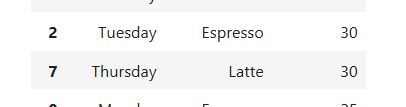

terlihat baris tersebut sama-sama terjual 30, namun yang di dahulukan adalah `Coffee Type = Espresso` karena tadi kita set **`Coffee Type`** ascending=True` 

---

---

## df.iterrows()

### Iterating over a DataFrame (df) with a For Loop

Lalu, ada cara lain yang sebenarnya tidak terlalu disarankan untuk digunakan banyak kasus, tapi terkadang cara ini bisa digunakan untuk melihat data baris per baris dari DataFrame secara detail. 

In [106]:
for index, row in coffee.iterrows():
    print(index)
    print(row)
    print('\n\n\n') # untuk memberi jarak satu baris dengan baris lain

0
Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object




1
Day            Monday
Coffee Type     Latte
Units Sold         15
Name: 1, dtype: object




2
Day             Tuesday
Coffee Type    Espresso
Units Sold           30
Name: 2, dtype: object




3
Day            Tuesday
Coffee Type      Latte
Units Sold          20
Name: 3, dtype: object




4
Day            Wednesday
Coffee Type     Espresso
Units Sold            35
Name: 4, dtype: object




5
Day            Wednesday
Coffee Type        Latte
Units Sold            25
Name: 5, dtype: object




6
Day            Thursday
Coffee Type    Espresso
Units Sold           40
Name: 6, dtype: object




7
Day            Thursday
Coffee Type       Latte
Units Sold           30
Name: 7, dtype: object




8
Day              Friday
Coffee Type    Espresso
Units Sold           45
Name: 8, dtype: object




9
Day            Friday
Coffee Type     Latte
Units Sold         35
Name: 9, dtype: object





## Filtering Data

Mari kita masuk ke data yang lebih menarik, dan kita akan mencoba *filtering data*. Dan kemungkinan hampir sisa tutorial `Pandas` akan menggunakan Data ini.

In [107]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


Jadi kita akan menggunakan data atlet dari `Olympics`. Kita lihat terlebih dahulu datanya : 

In [108]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [109]:
bios.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18
145499,149814,Bill Phillips,1913-07-15,Dulwich Hill,New South Wales,AUS,Australia,NaN,NaN,2003-10-20


Nah kita bakal apain nih data? bakal ngelakuin filtering apa?

Mungkin bisa kita mulai dengan filtering .. tinggi badan (height) deh ya :

In [110]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


Kita lihat berdasarkan informasi data diatas, jika `height_cm`bertipe data `float` dan tentunya menggunakan satuan *centi meter*

### Syntax Options, Numeric Values, Multiple Conditions

In [111]:
bios.loc[bios["height_cm"] > 200]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
1080,1087,Bozhil Lozanov,1934-08-16,NaN,NaN,NaN,Bulgaria,208.0,133.0,NaN
1673,1680,Alexis Rubalcaba,1972-08-09,Pedro Betancourt,Matanzas,CUB,Cuba,204.0,95.0,NaN
2647,2659,Milan Šrejber,1963-12-30,Praha (Prague),Hlavní město Praha,CZE,Czechoslovakia,203.0,98.0,NaN
2827,2839,Nik'oloz Deriugini,1959-04-30,Kutaisi,Imereti,GEO,Soviet Union,206.0,105.0,NaN
2832,2844,Elşad Qadaşev,1968-05-01,Bakı,Bakı,AZE,Unified Team,205.0,110.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143784,147440,Daniel Miklasevich,1997-07-17,NaN,NaN,NaN,United States,203.0,NaN,NaN
143833,147489,Garrett Muagututia,1988-02-26,NaN,NaN,NaN,United States,205.0,NaN,NaN
143834,147490,Kyle Ensing,1997-03-06,NaN,NaN,NaN,United States,201.0,NaN,NaN
143835,147491,Mitch Stahl,1994-08-31,NaN,NaN,NaN,United States,203.0,NaN,NaN


### String Operations, Regular Expressions (Regex)

### Query Functions